# Import useful module

In [1]:
import pandas as pd
import numpy as np

from pandas_profiling import ProfileReport
from sklearn.linear_model import LogisticRegression, LinearRegression
from catboost import CatBoostClassifier
from xgboost import XGBClassifier, XGBRFClassifier 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold,StratifiedKFold
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.metrics import mean_absolute_error as mae, roc_auc_score,accuracy_score
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt 

%matplotlib inline

# Read data

In [2]:
df = pd.read_csv('../data/wesad-classification-hrv-train-dataset.csv')
df.head()

MEAN_RR    MEDIAN_RR       SDRR      RMSSD       SDSD  SDRR_RMSSD  \
0   860.758450   858.389130  75.161448  14.461513  14.460581    5.197343   
1  1044.449374  1036.796500  82.209648  22.516679  22.515843    3.651056   
2   510.072193   503.341590  32.094249   8.549018   8.547740    3.754145   
3   930.296969   940.394165  59.089578   7.816167   7.814190    7.559917   
4   692.067906   687.546285  47.584437   6.487698   6.487256    7.334564   

           HR  pNN25  pNN50        SD1  ...  MEAN_RR_MEAN_MEAN_REL_RR  \
0   70.242263   6.25   0.75  10.238012  ...             -5.208054e+06   
1   57.792396  28.50   2.25  15.941094  ...              4.953282e+06   
2  118.059988   3.50   0.00   6.051753  ...             -1.685542e+06   
3   64.769049   0.00   0.00   5.532404  ...              5.520502e+06   
4   87.096547   0.00   0.00   4.592942  ...              6.091203e+06   

     SD2_LF     HR_LF      HR_HF    HF_VLF  subject id  condition  SSSQ class  \
0  0.137408  0.091228   3.666502  0.009514           7   baseline         low   
1  0.059868  0.030044  25.537614  0.001175           4   baseline         low   
2  0.127065  0.333489   3.031509  0.084238          13     stress      medium   
3  0.505268  0.392480  11.410422  0.004625           5   baseline        high   
4  0.248241  0.322039  19.549568  0.003409           5     stress        high   

   SSSQ Label  condition label  
0           0                0  
1           0                0  
2           1                2  
3           2                0  
4           2                2  

[5 rows x 67 columns]

In [3]:
df['SSSQ Label'].unique()

array([0, 1, 2], dtype=int64)

In [4]:
print(df.columns)

Index(['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR',
       'pNN25', 'pNN50', 'SD1', 'SD2', 'KURT', 'SKEW', 'MEAN_REL_RR',
       'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR',
       'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR', 'VLF', 'VLF_PCT',
       'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF',
       'HF_LF', 'MEAN_RR_LOG', 'MEAN_RR_SQRT', 'TP_SQRT', 'MEDIAN_REL_RR_LOG',
       'RMSSD_REL_RR_LOG', 'SDSD_REL_RR_LOG', 'VLF_LOG', 'LF_LOG', 'HF_LOG',
       'TP_LOG', 'LF_HF_LOG', 'RMSSD_LOG', 'SDRR_RMSSD_LOG', 'pNN25_LOG',
       'pNN50_LOG', 'SD1_LOG', 'KURT_YEO_JONSON', 'SKEW_YEO_JONSON',
       'MEAN_REL_RR_YEO_JONSON', 'SKEW_REL_RR_YEO_JONSON', 'LF_BOXCOX',
       'HF_BOXCOX', 'SD1_BOXCOX', 'KURT_SQUARE', 'HR_SQRT',
       'MEAN_RR_MEAN_MEAN_REL_RR', 'SD2_LF', 'HR_LF', 'HR_HF', 'HF_VLF',
       'subject id', 'condition', 'SSSQ class', 'SSSQ Label',
       'condition label'],
      dtype='object')


# Select useful features from the WESAD-SWELL dataset

In [5]:
features = ['MEAN_RR','SDRR','HR','RMSSD','pNN50','VLF','LF','HF','subject id','SSSQ Label']
train_df = df[features]
train_df.head()

MEAN_RR       SDRR          HR      RMSSD  pNN50          VLF  \
0   860.758450  75.161448   70.242263  14.461513   0.75  2013.584521   
1  1044.449374  82.209648   57.792396  22.516679   2.25  1926.201330   
2   510.072193  32.094249  118.059988   8.549018   0.00   462.314125   
3   930.296969  59.089578   64.769049   7.816167   0.00  1227.245560   
4   692.067906  47.584437   87.096547   6.487698   0.00  1306.992460   

            LF         HF  subject id  SSSQ Label  
0   769.968054  19.157841           7           0  
1  1923.619778   2.263030           4           0  
2   354.014573  38.944294          13           1  
3   165.025098   5.676306           5           2  
4   270.453366   4.455165           5           2

# Perform EDA

## Pandas profiling

In [6]:
from pandas_profiling import ProfileReport
prof = ProfileReport(train_df)
prof.to_file(output_file='../data/hrv_profile_output.html')

c:\python37\lib\site-packages\pandas\core\frame.py:4301: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [7]:
prof

## Class Balance

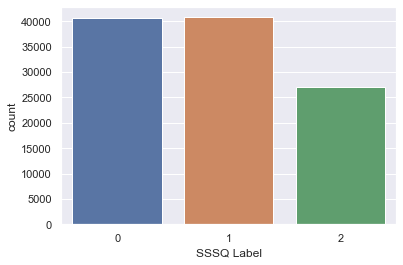

In [9]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="SSSQ Label", data=train_df)

## Interpretation  

1) There are many outliers for most of the HRV features, especially  the pNN50 feature, thus it is necessary  to perform outlier detection : use IForest model to detect outlier, used median to replace them

2) The HR and Mean_RR features are highly correlated, one must be removed
==> need to perform feature selection

3) the pNN50 feature has 51,8% zeros
==> need to perform feature engineering to replace these zero values : used a Linear regression model to predict the pNN50 values to replace the zero values 

4) The feature values must be rescaled

5) The classes are quite balanced


# Data cleaning

## Replace zero values (pNN Feature) 

The pNN50 feature consists of 51.8 % zero values. Those values should be replaced for an accurate prediction.
However, they can't be replaced by the median or the mean value since the pNN50 have been computed from the other HRV metrics. It won't be so logical if the mean or the median is used in that case. 
Thus, let's use a simple linear regression model to predict the values that should replace the zero values of the pNN50 features. 

In [13]:
def replace_pNN50_zeros(df,):
    """
    This function replaces the zero values of the pNN50 feature
    
    Parameters:
        df (DataFrame): the dataframe containing the values to be cleaned
    Returns:
        new_db (DataFrame): the cleaned dataframe
    """
    db = df.copy()
    clf = LinearRegression()
    df_pNN50_test = db.loc[db['pNN50']==0]
    df_pNN50_train = db.loc[db['pNN50']>0]
    
    target = df_pNN50_train['pNN50']

    clf.fit(df_pNN50_train.drop(columns=['pNN50','subject id','SSSQ Label']),target)
    
    test = df_pNN50_test.drop(columns=['pNN50','subject id','SSSQ Label'])
    df_pNN50_test['pNN50'] = clf.predict(test)
    
    new_db = pd.concat((df_pNN50_train,df_pNN50_test))
    
    return new_db

In [14]:
train_db = replace_pNN50_zeros(train_df)
train_db.head()

c:\python37\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


MEAN_RR        SDRR         HR      RMSSD  pNN50          VLF  \
0   860.758450   75.161448  70.242263  14.461513   0.75  2013.584521   
1  1044.449374   82.209648  57.792396  22.516679   2.25  1926.201330   
5  1161.808428  107.366073  52.091030  29.467746  10.00  3317.780715   
6  1013.129639   70.268744  59.508205  23.066288   1.75  1356.753414   
7   760.262970  116.903376  80.827089  16.266782   0.50  3672.832680   

            LF         HF  subject id  SSSQ Label  
0   769.968054  19.157841           7           0  
1  1923.619778   2.263030           4           0  
5  3385.955854   1.913896           3           1  
6  2309.046294   3.335744           4           0  
7  1666.725883  39.069182          17           1

## Outlier Detection with IForest 

In [15]:
from pyod.models.iforest import IForest 
from pyod.models.knn import KNN 

# global outlier prediction 
def predict_outlier(db):
    """
    This function detects outliers globally 
    
    Parameters:
        db (DataFrame): the dataframe containing the values to be cleaned
    Returns:
        db_tr (DataFrame): the  dataframe with detected outliers
    """
    db_tr = db.copy() 
    clf =  IForest() 
    clf.fit(db_tr.drop(columns=['subject id','SSSQ Label']))
    db_tr['is_outlier'] = clf.predict(db_tr.drop(columns=['subject id','SSSQ Label']))
    
    return db_tr

In [16]:
# globaly treat outlier
def treat_outlier(db):
    """
    This function treats outliers globally 
    
    Parameters:
        db (DataFrame): the dataframe containing the outliers to be cleaned
    Returns:
        new_db (DataFrame): the  dataframe with cleaned outliers
    """
    features = db.columns
    features = features.drop(['subject id','SSSQ Label','is_outlier'])
    mask = db['is_outlier'] == 1
    
    for f in features: 
        db.loc[mask, f] = db[f].median()
    new_db = db.drop(columns=['is_outlier'])
    return new_db

In [19]:
# outlier prediction per feature
def predict_and_treat_outlier(db,feat):
    """
    This function treats outliers for a given feature 
    
    Parameters:
        db (DataFrame): the dataframe containing the outliers to be cleaned
        feat (string): the given feature 
    Returns:
        db (DataFrame): the  dataframe with cleaned outliers
    """
    db_clean=  db[[feat]]
    clf = IForest() 
    clf.fit(db_clean)
    db['is_outlier'] = clf.predict(db_clean)
    mask = db['is_outlier'] == 1
    db.loc[mask, feat] = db[feat].median()
    return db  

In [20]:
train_outlier = predict_outlier(train_db)
train_outlier.head()

MEAN_RR        SDRR         HR      RMSSD  pNN50          VLF  \
0   860.758450   75.161448  70.242263  14.461513   0.75  2013.584521   
1  1044.449374   82.209648  57.792396  22.516679   2.25  1926.201330   
5  1161.808428  107.366073  52.091030  29.467746  10.00  3317.780715   
6  1013.129639   70.268744  59.508205  23.066288   1.75  1356.753414   
7   760.262970  116.903376  80.827089  16.266782   0.50  3672.832680   

            LF         HF  subject id  SSSQ Label  is_outlier  
0   769.968054  19.157841           7           0           0  
1  1923.619778   2.263030           4           0           0  
5  3385.955854   1.913896           3           1           1  
6  2309.046294   3.335744           4           0           0  
7  1666.725883  39.069182          17           1           0

In [21]:
train_cleaned = treat_outlier(train_outlier)
train_cleaned.head()

MEAN_RR        SDRR         HR      RMSSD     pNN50          VLF  \
0   860.758450   75.161448  70.242263  14.461513  0.750000  2013.584521   
1  1044.449374   82.209648  57.792396  22.516679  2.250000  1926.201330   
5   798.307355   65.206773  75.974129  13.572768  0.400404  1277.750655   
6  1013.129639   70.268744  59.508205  23.066288  1.750000  1356.753414   
7   760.262970  116.903376  80.827089  16.266782  0.500000  3672.832680   

            LF         HF  subject id  SSSQ Label  
0   769.968054  19.157841           7           0  
1  1923.619778   2.263030           4           0  
5   860.731158  18.652605           3           1  
6  2309.046294   3.335744           4           0  
7  1666.725883  39.069182          17           1

In [21]:
# treat outliers per feature
features = train_db.columns.drop(['subject id','SSSQ Label'])

for f in features:
    train_db = predict_and_treat_outlier(train_db[features],f)

train_db.head()

c:\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\python37\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


MEAN_RR        SDRR         HR      RMSSD     pNN50          VLF  \
0   860.758450   75.161448  70.242263  14.461513  0.750000  2013.584521   
1  1044.449374   82.209648  57.792396  22.516679  2.250000  1926.201330   
5   798.307355  107.366073  75.974129  13.572768  0.400404  1277.750655   
6  1013.129639   70.268744  59.508205  23.066288  1.750000  1356.753414   
7   760.262970  116.903376  80.827089  16.266782  0.500000  1277.750655   

            LF         HF  is_outlier  
0   769.968054  19.157841           0  
1  1923.619778   2.263030           0  
5   860.731158   1.913896           0  
6  2309.046294   3.335744           0  
7  1666.725883  39.069182           0

# Model Training 

In [24]:
X_train = train_cleaned.drop(columns=['subject id','SSSQ Label']) #  train_db 
y_train = train_cleaned['SSSQ Label'] # train_df['SSSQ Label']  

## Split test and train

In [38]:
X_train.columns

Index(['MEAN_RR', 'SDRR', 'HR', 'RMSSD', 'pNN50', 'VLF', 'LF', 'HF'], dtype='object')

In [39]:
y_train.unique().shape[0]

3

## StratifiedKFold

In [60]:
bad_feat = []

epochs = 4
kf = StratifiedKFold(n_splits=epochs, shuffle=True, random_state=30) #30
label_card = y_train.unique().shape[0]
y_oof = np.zeros((X_train.shape[0], label_card))
# y_test = np.zeros((X_test.shape[0], label_card))
i = 0
METRICS = []
#scale data 
SCALE = False
if SCALE:  
    scaler = MinMaxScaler()
    X_train[X_train.columns.drop(bad_feat)] = scaler.fit_transform(
        X_train.drop(columns=bad_feat))

#split using stratified KFold
for tr_idx, val_idx in kf.split(X_train, y_train):
    X_tr, X_vl = X_train.iloc[tr_idx, :], X_train.iloc[val_idx, :]
    y_tr, y_vl = y_train.iloc[tr_idx], y_train.iloc[val_idx]
    X_tr = X_tr.drop(columns=bad_feat)
    X_vl = X_vl.drop(columns=bad_feat) 
    MODEL = 'ctb'          
    if MODEL == 'lgb':
        model =  LGBMClassifier(n_estimators=30, random_state=47)
    elif MODEL == 'xgb': 
        model = XGBClassifier(n_estimators=50, random_state=47, max_depth=10)
    elif MODEL =='ctb':
        model = CatBoostClassifier(random_state=47)
    else:
        model = MLPClassifier(random_state=47)    
   
    model.fit(X_tr, y_tr) 
    y_pred = model.predict_proba(X_vl)
    y_oof[val_idx, :] = y_pred
    print("AUC  Fold # " + str(i) + ": " +
          str(roc_auc_score(pd.get_dummies(y_vl), y_pred, multi_class='ovr')))
    i += 1
auc = roc_auc_score(pd.get_dummies(y_train), y_oof,multi_class='ovr')

print("AUC full " + str(auc))
METRICS.append(auc)
METRICS = np.array(METRICS).mean()
print("Global Metrics: {}".format(METRICS))

AUC  Fold # 0: 0.995571371350174
AUC  Fold # 1: 0.9952048331490352
AUC  Fold # 2: 0.9955013758914438
AUC  Fold # 3: 0.9956215129275447
AUC full 0.9953647215360593
Global Metrics: 0.9953647215360593


# Save model

In [61]:
# save the model to disk
import pickle
# filename = '../model_saved/hrv_classifier_model.sav'
filename = '../model_saved/hrv_classifier_model_ctb.sav'
pickle.dump(model, open(filename, 'wb'))

## Test the model

In [62]:
# load the model from disk
label = {0:"low", 1:"medium", 2:"high"}
test = pd.read_csv('../data/wesad-classification-hrv-test-dataset.csv')
features = ['MEAN_RR','SDRR','HR','RMSSD','pNN50','VLF','LF','HF','subject id','SSSQ Label']
test_df = test[features]
test_df.head()

MEAN_RR       SDRR          HR      RMSSD  pNN50          VLF  \
0  856.640559  63.543133   70.436793  15.490732    0.0  1023.799120   
1  911.890969  49.739529   65.996032  11.485676    0.0  1372.472455   
2  505.424097  27.207534  119.049905   5.217502    0.0   186.962752   
3  976.606489  93.145519   62.014311  24.999690    4.0  2197.685692   
4  740.323476  73.676039   81.833707  10.740166    0.0  3144.952405   

            LF         HF  subject id  SSSQ Label  
0  1065.508704  32.667024           8           1  
1   491.062152   7.161468           6           1  
2   212.327622  13.536031          11           2  
3  2249.469243   6.202481          17           0  
4   536.546893  14.150710          15           1

In [63]:
# preprocess test data 
test_df = replace_pNN50_zeros(test_df)
test_df = predict_outlier(test_df)
test_df = treat_outlier(test_df)
test_df.head()

c:\python37\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


MEAN_RR        SDRR          HR      RMSSD     pNN50          VLF  \
3   976.606489   93.145519   62.014311  24.999690  4.000000  2197.685692   
6   586.045285   52.214599  103.132294  12.697451  0.750000   304.909381   
7   596.261766  104.867031  103.626745  14.489375  1.000000  1188.909796   
8   800.186580   65.445843   75.842259  13.573160  0.430472  1275.239299   
9  1048.823518   98.312125   57.788262  19.586153  2.000000  1985.596732   

            LF         HF  subject id  SSSQ Label  
3  2249.469243   6.202481          17           0  
6  1048.040348  79.357731          17           1  
7  1198.215684  47.595020          17           1  
8   862.960399  18.492626           3           1  
9  1456.549753   3.218573           7           1

In [65]:
# load the model 
loaded_model = pickle.load(open(filename, 'rb'))
bad_feat = ['subject id', 'SSSQ Label']
# predict 
pred = loaded_model.predict_proba(test_df.drop(columns=bad_feat))
pred_df = pd.DataFrame(pred)
pred_df

0         1         2
0      0.982217  0.013227  0.004557
1      0.012277  0.975859  0.011864
2      0.014604  0.968819  0.016576
3      0.335726  0.615980  0.048295
4      0.016707  0.975694  0.007599
...         ...       ...       ...
13560  0.003576  0.002805  0.993619
13561  0.961594  0.034520  0.003886
13562  0.003265  0.004129  0.992606
13563  0.005028  0.005155  0.989817
13564  0.017810  0.775080  0.207110

[13565 rows x 3 columns]

In [66]:
test = pd.read_csv('../hrv_test_data/hrv-3.csv')
test.head()

MEAN_RR   MEDIAN_RR      SDRR      RMSSD      SDSD  SDRR_RMSSD  \
0  813.487251  812.393075  36.41442  11.722249  11.71985    3.106436   

          HR  pNN25  pNN50      SD1  ...  MEAN_RR_MEAN_MEAN_REL_RR    SD2_LF  \
0  73.905611    3.5      0  8.29759  ...               2498761.475  0.134053   

      HR_LF    HR_HF   HF_VLF  subject id  condition  SSSQ class  SSSQ Label  \
0  0.194929  1.47117  0.17144          14   baseline        high           2   

   condition label  
0                0  

[1 rows x 67 columns]

In [67]:
test_df = test[features]
test_df.head()

MEAN_RR      SDRR         HR      RMSSD  pNN50         VLF          LF  \
0  813.487251  36.41442  73.905611  11.722249      0  293.023578  379.140254   

          HF  subject id  SSSQ Label  
0  50.235934          14           2

In [68]:
pred = loaded_model.predict_proba(test_df.drop(columns=bad_feat))
pred

array([[0.00516329, 0.01225038, 0.9825864 ]], dtype=float32)

In [69]:
label[np.argmax(pred)]

'high'

In [71]:
confidence  = pred[0][np.argmax(pred)]*100
print("Your stress level is " + label[np.argmax(pred)] + " with "+"%.2f" % confidence  +"% confidence")

Your stress level is high with 98.26% confidence


## Model interpretation 

1- Catboost model's performance : 
    * cleaned outlier features:  Global Metrics: 0.9956
 
2- XGB model's performance :  
    * cleaned outlier features: Global Metrics: 0.993882656385425

# Feature importance

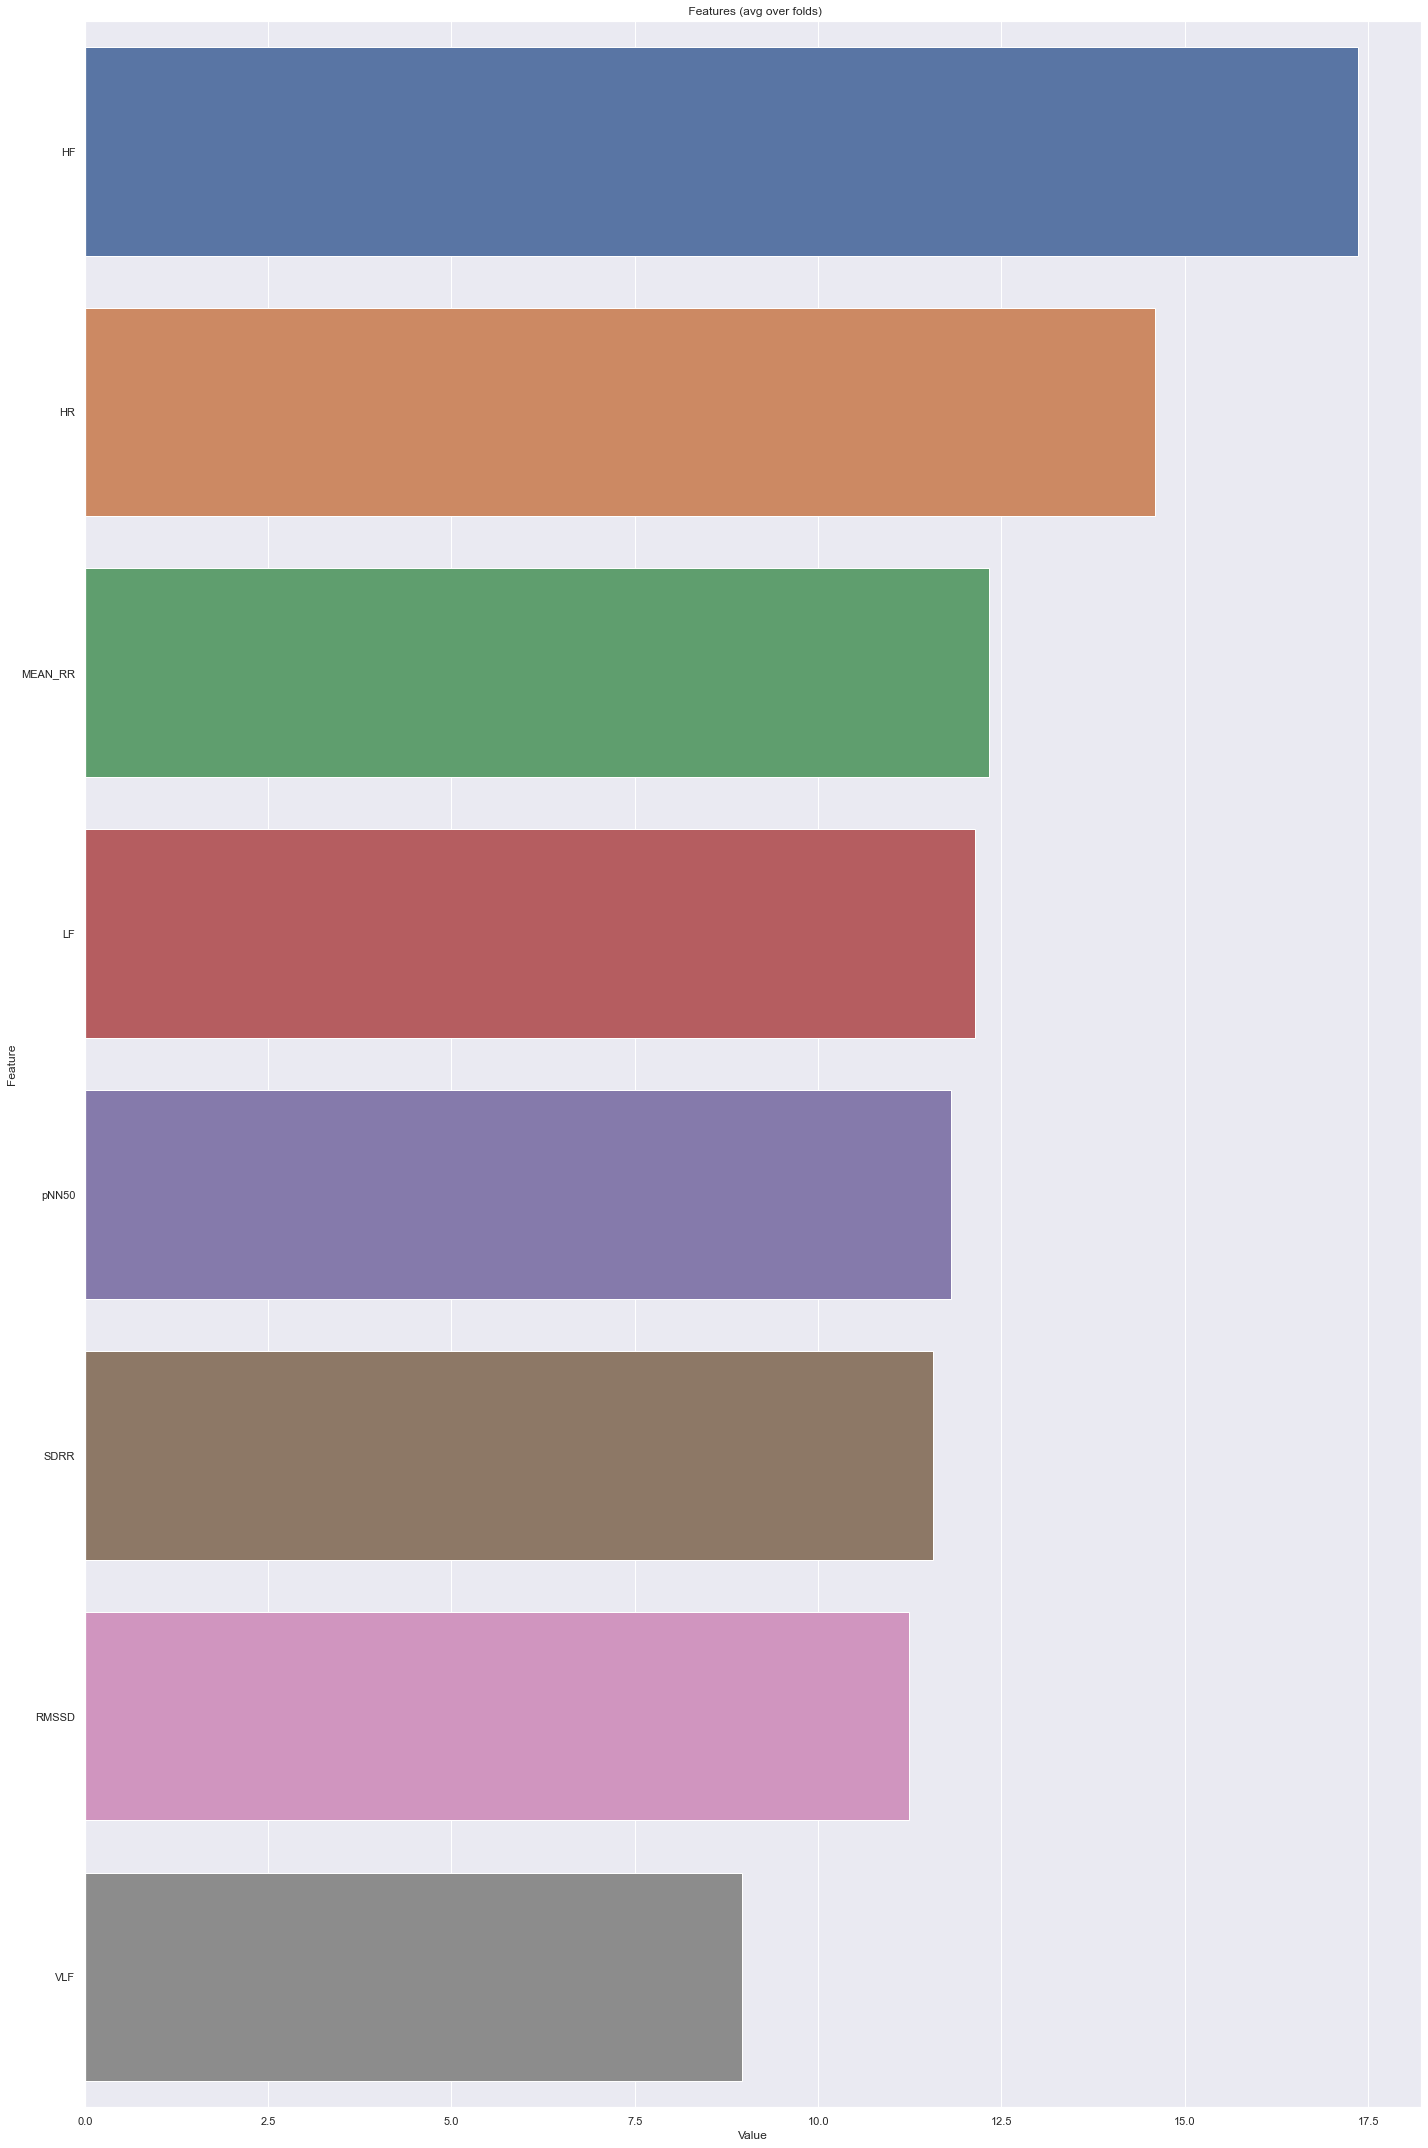

In [53]:
feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_,X_train.drop(bad_feat, 1).columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 30))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title(' Features (avg over folds)')
plt.tight_layout()
plt.show() 